In [1]:
#Improting ETA, visualization, Machine Learning, Linear Regression libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


## Step 1: Exploratory Data Analysis & Visualization

In [117]:
# load the dataset
bike_ds = pd.read_csv("day.csv")
bike_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
bike_ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [119]:
bike_ds.shape

(730, 16)

In [120]:
bike_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [121]:
bike_ds.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
# EDA Inferance #1 -  there is no null data, so we dont have to fill in values

In [122]:
bike_ds.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [20]:
# Data Cleaning

In [21]:
# Drop Casual, Registered & instant as they will not be useful for the analysis

In [123]:
bike_ds.drop(['registered','casual','instant'],axis=1, inplace=True)

In [124]:
bike_ds.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [125]:
bike_ds_master = bike_ds
bike_ds_master.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Change Season, Year, Month, weekday, holiday, workingday & weathersit to categorical values

In [126]:
def season(value):
    if value == 1:
        return 'Spring'
    elif value == 2:
        return 'Summer'
    elif value == 3:
        return 'Fall'
    else:
        return 'Winter'

bike_ds_master['Season'] = bike_ds_master['season'].apply(season)

In [127]:
def year(value):
    if value == 0:
        return '2018'
    else:
        return '2019'
bike_ds_master['Yr'] = bike_ds_master['yr'].apply(year)

In [128]:
def weekday(value):
    if value == 0:
        return 'sunday'
    elif value == 1:
        return 'monday'
    elif value == 2:
        return 'tuesday'
    elif value ==3:
        return 'wednesday'
    elif value ==4:
        return 'thursday'
    elif value == 5:
        return 'friday'
    else:
        return 'saturday'
    
bike_ds_master['Weekday'] = bike_ds_master['weekday'].apply(weekday) 

In [129]:
def weathersit(value):
    if value == 1:
        return 'clear'
    elif value == 2:
        return 'mist'
    elif value == 3:
        return 'snow'
    else:
        return 'heavy_rain'
    
bike_ds_master['Weathersit'] = bike_ds_master['weathersit'].apply(weathersit)

In [130]:
def month(value):
    if value == 1:
        return 'jan'
    elif value == 2:
        return 'feb'
    elif value == 3:
        return 'mar'
    elif value == 4:
        return 'apr'
    elif value == 5:
        return 'may'
    elif value == 6:
        return 'jun'
    elif value == 7:
        return 'jul'
    elif value == 8:
        return 'aug'
    elif value == 9:
        return 'sep'
    elif value == 10:
        return 'oct'
    elif value == 11:
        return 'nov'
    else:
        return 'dec'

bike_ds_master['Mnth'] = bike_ds_master['mnth'].apply(month) 

In [131]:
def holiday(value):
    if value == 0:
        return 'No'
    else:
        return 'Yes'
    
bike_ds_master['Holiday'] = bike_ds_master['holiday'].apply(holiday)

In [132]:
def workingday(value):
    if value == 0:
        return 'No'
    else:
        return 'Yes'
    
bike_ds_master['Workingday'] = bike_ds_master['workingday'].apply(workingday)

In [133]:
bike_ds_master.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Season,Yr,Weekday,Weathersit,Mnth,Holiday,Workingday
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Spring,2018,saturday,mist,jan,No,No
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Spring,2018,sunday,mist,jan,No,No
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,2018,monday,clear,jan,No,Yes
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,2018,tuesday,clear,jan,No,Yes
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,2018,wednesday,clear,jan,No,Yes


In [135]:
drop_columns = ['season','yr','weekday','weathersit','mnth','holiday','workingday']
bike_ds_master.drop(drop_columns,axis=1,inplace = True)

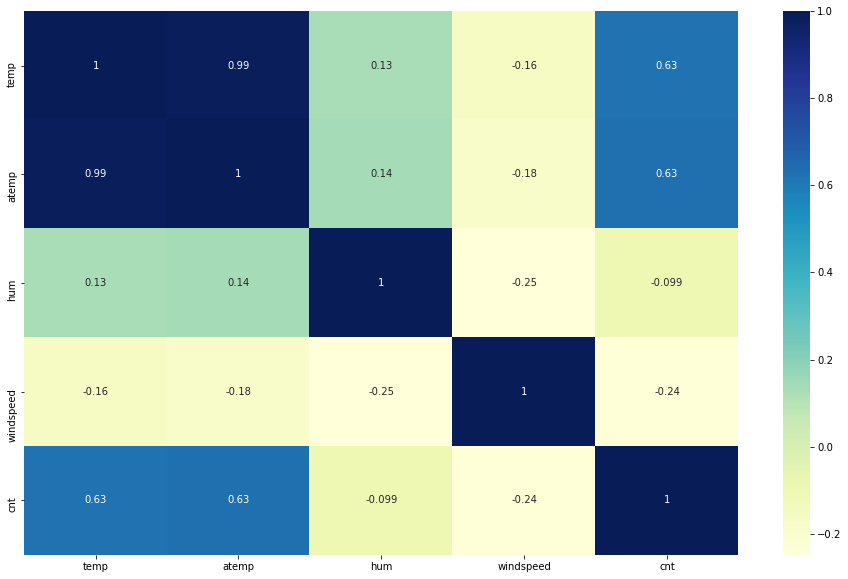

In [136]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_ds_master.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [48]:
# Drop atemp and it has a storng correlation with actual temp

In [137]:
bike_ds_master.drop(['atemp'], axis=1, inplace=True)

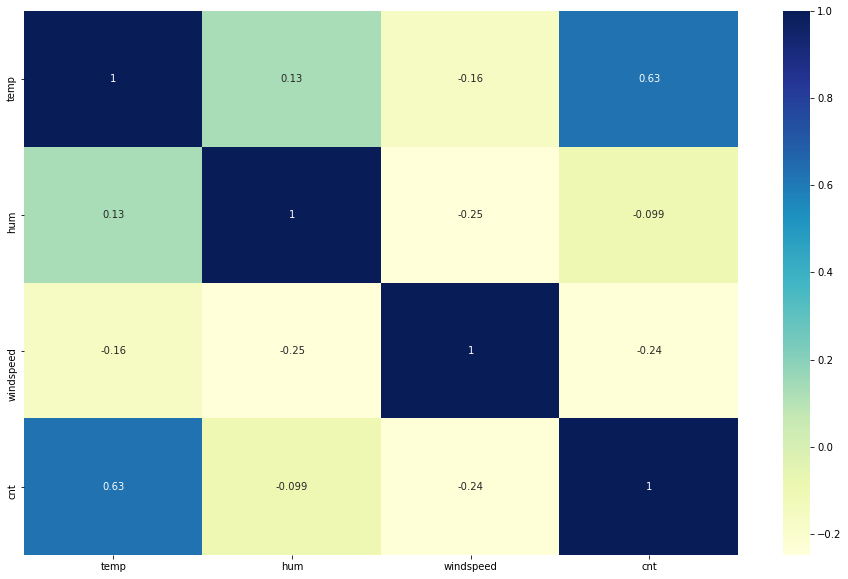

In [138]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_ds.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# We can see that actual temp has a positive correlation with the cnt variable  - 0.63
# We can see that as the humidity increases the cnt decreases which states that bikers do not like the humid weather - -0.099
# We can see that as the windpeed increases the cnt decreases which states that bikers do not like the windy climate - -0.24 

In [ ]:
# Data visualization for numerical predictors

<function matplotlib.pyplot.show(close=None, block=None)>

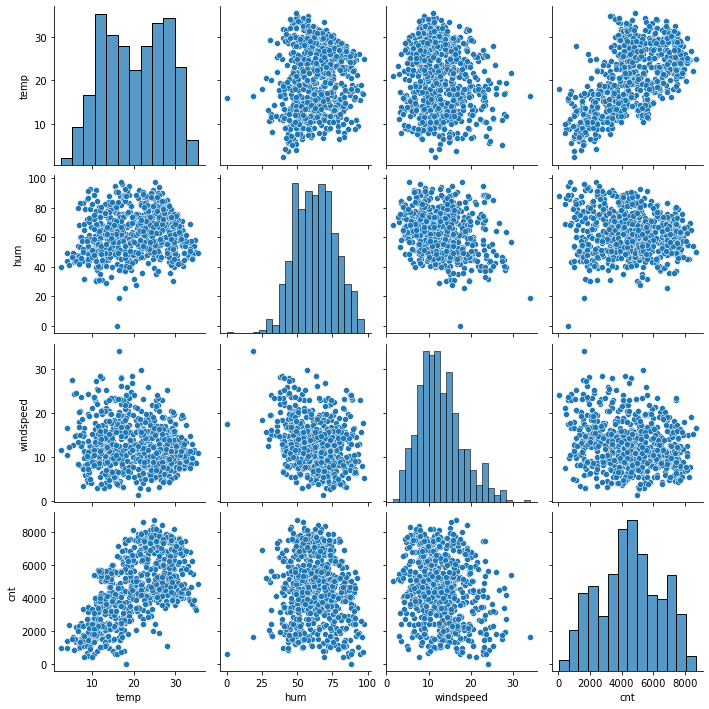

In [139]:
sns.pairplot(bike_ds_master[['temp','hum','windspeed','cnt']])     
plt.show

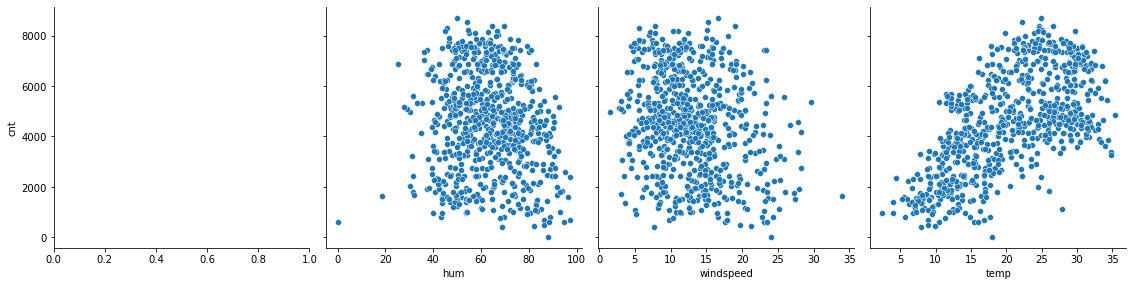

In [140]:
sns.pairplot(bike_ds_master, x_vars=['','hum', 'windspeed','temp'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# Data visualization for categorical values

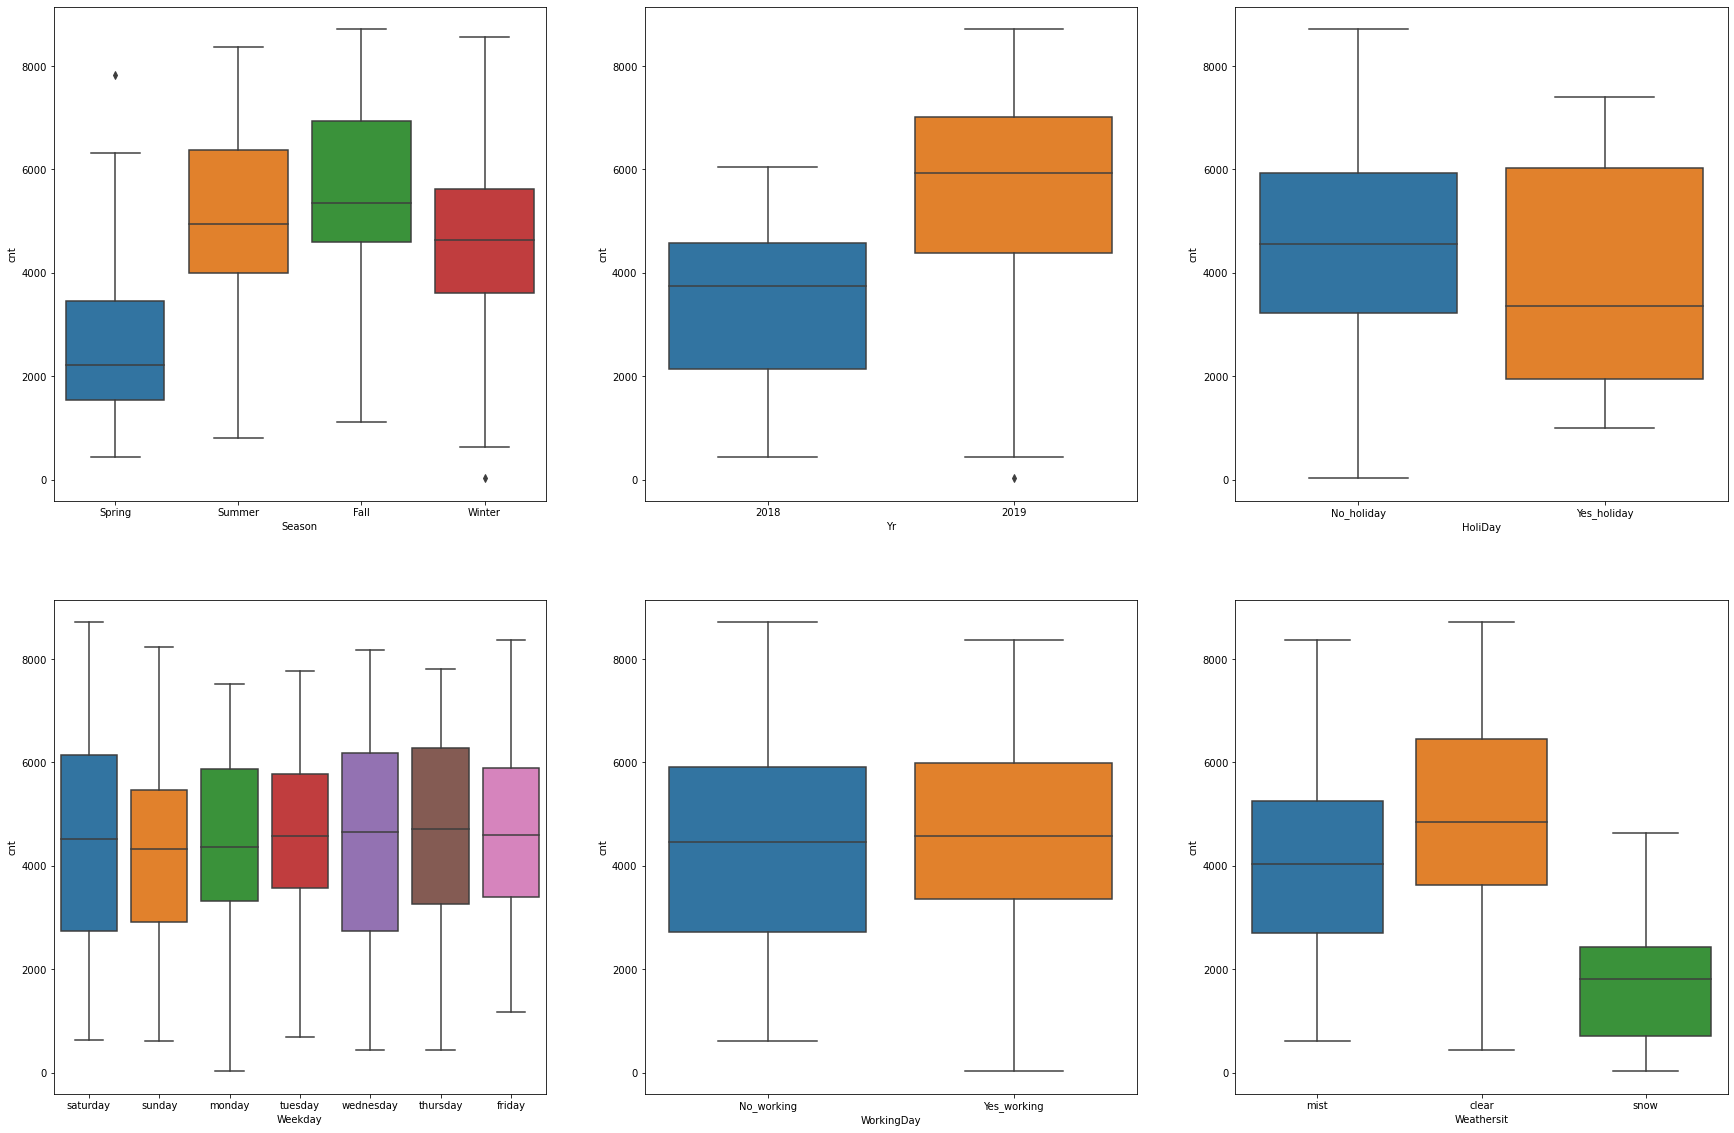

In [160]:
# Plotting boxplots to dipict the affect of each categorical variable on the target variable 'cnt'.
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'Season', y = 'cnt', data = bike_ds_master)
plt.subplot(2,3,2)
sns.boxplot(x = 'Yr', y = 'cnt', data = bike_ds_master)
plt.subplot(2,3,3)
sns.boxplot(x = 'HoliDay', y = 'cnt', data = bike_ds_master)
plt.subplot(2,3,4)
sns.boxplot(x = 'Weekday', y = 'cnt', data = bike_ds_master)
plt.subplot(2,3,5)
sns.boxplot(x = 'WorkingDay', y = 'cnt', data = bike_ds_master)
plt.subplot(2,3,6)
sns.boxplot(x = 'Weathersit', y = 'cnt', data = bike_ds_master)
plt.show()
# We can see that how the median values varies for each of these categorical variables.

In [143]:
bike_ds_master.to_csv('bike_ds.csv', encoding='utf-8', index=False)

## Step 2: Data Preparation

In [ ]:
# Convert the categorical values into dummies and binaries to  0,1

In [151]:
# as we have working & holiday values as yes, holiday & no, i will convert the same to binaries back

In [152]:
def changevalues(value):
    if value == 'No':
        return 'No_working'
    else:
        return 'Yes_working'
    
bike_ds_master['WorkingDay'] = bike_ds_master['Workingday'].apply(changevalues)

In [159]:
bike_ds_master.head()

,dteday,temp,hum,windspeed,cnt,Season,Yr,Weekday,Weathersit,Mnth,WorkingDay,HoliDay
0,01-01-2018,14.110847,80.5833,10.749882,985,Spring,2018,saturday,mist,jan,No_working,No_holiday
1,02-01-2018,14.902598,69.6087,16.652113,801,Spring,2018,sunday,mist,jan,No_working,No_holiday
2,03-01-2018,8.050924,43.7273,16.636703,1349,Spring,2018,monday,clear,jan,Yes_working,No_holiday
3,04-01-2018,8.200000,59.0435,10.739832,1562,Spring,2018,tuesday,clear,jan,Yes_working,No_holiday
4,05-01-2018,9.305237,43.6957,12.522300,1600,Spring,2018,wednesday,clear,jan,Yes_working,No_holiday


In [156]:
def changevaluesagain(value):
    if value == 'No':
        return 'No_holiday'
    else:
        return 'Yes_holiday'
bike_ds_master['HoliDay'] = bike_ds_master['Holiday'].apply(changevaluesagain)

In [158]:
bike_ds_master.drop(['Holiday','Workingday'],axis=1, inplace=True)

In [161]:
season = pd.get_dummies(bike_ds_master['Season'],drop_first=True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [162]:
# Year variable
yr = pd.get_dummies(bike_ds_master['Yr'],drop_first=True)
yr.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [163]:
# Weekday variable
weekday = pd.get_dummies(bike_ds_master['Weekday'],drop_first=True)
weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [164]:
# Weathersit variable
weathersit = pd.get_dummies(bike_ds_master['Weathersit'],drop_first=True)
weathersit.head()

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [166]:
# month variable
month = pd.get_dummies(bike_ds_master['Mnth'],drop_first=True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [167]:
# Holiday variable
holiday = pd.get_dummies(bike_ds_master['HoliDay'],drop_first=True)
holiday.head()

,Yes_holiday
0,0
1,0
2,0
3,0
4,0


In [168]:
# Working day variable
workingday = pd.get_dummies(bike_ds_master['WorkingDay'],drop_first=True)
workingday.head()

,Yes_working
0,0
1,0
2,1
3,1
4,1


In [169]:
bike_ds_master.shape


(730, 12)

In [211]:
bike_ds_master.columns

Index(['dteday', 'temp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer',
       'Winter', '2019', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'mist', 'snow', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'Yes_holiday', 'Yes_working'],
      dtype='object')

In [170]:
# Firsly we will merge them altogether
frames = [bike_ds_master,season,yr,weekday,weathersit,month,holiday,workingday]
bike_ds_master = pd.concat(frames,axis = 1)

In [171]:
bike_ds_master.shape

(730, 37)

In [212]:
bike_ds_master.columns

Index(['dteday', 'temp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer',
       'Winter', '2019', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'mist', 'snow', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'Yes_holiday', 'Yes_working'],
      dtype='object')

In [172]:
drop_col1 = ['Season','Yr','Weekday','Weathersit','Mnth','HoliDay','WorkingDay']
bike_ds_master.drop(drop_col1,axis = 1, inplace = True)

In [173]:
bike_ds_master.shape

(730, 30)

In [213]:
bike_ds_master.columns

Index(['dteday', 'temp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer',
       'Winter', '2019', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'mist', 'snow', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'Yes_holiday', 'Yes_working'],
      dtype='object')

In [53]:
# Divide the data to train and test.

In [231]:
# Spliting the data into train and test datasets
np.random.seed(0)
bike_ds_train, bike_ds_test = train_test_split(bike_ds_master, train_size = 0.7, test_size = 0.3, random_state = 100)

In [232]:
bike_ds_train.shape

(510, 30)

In [233]:
bike_ds_train

,dteday,temp,hum,windspeed,cnt,Spring,Summer,Winter,2019,monday,...,jan,jul,jun,mar,may,nov,oct,sep,Yes_holiday,Yes_working
653,16-10-2019,19.201653,55.8333,12.208807,7534,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
576,31-07-2019,29.246653,70.4167,11.083475,7216,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
426,03-03-2019,16.980847,62.1250,10.792293,4066,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
728,30-12-2019,10.489153,48.3333,23.500518,1796,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
482,28-04-2019,15.443347,48.9583,8.708325,4220,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,11-06-2019,29.554153,58.7917,13.916771,6664,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
578,02-08-2019,30.852500,65.9583,8.666718,7261,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
53,23-02-2018,9.091299,42.3043,6.305571,1917,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350,17-12-2018,10.591653,56.0833,16.292189,2739,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
bike_ds_test.shape

(219, 30)

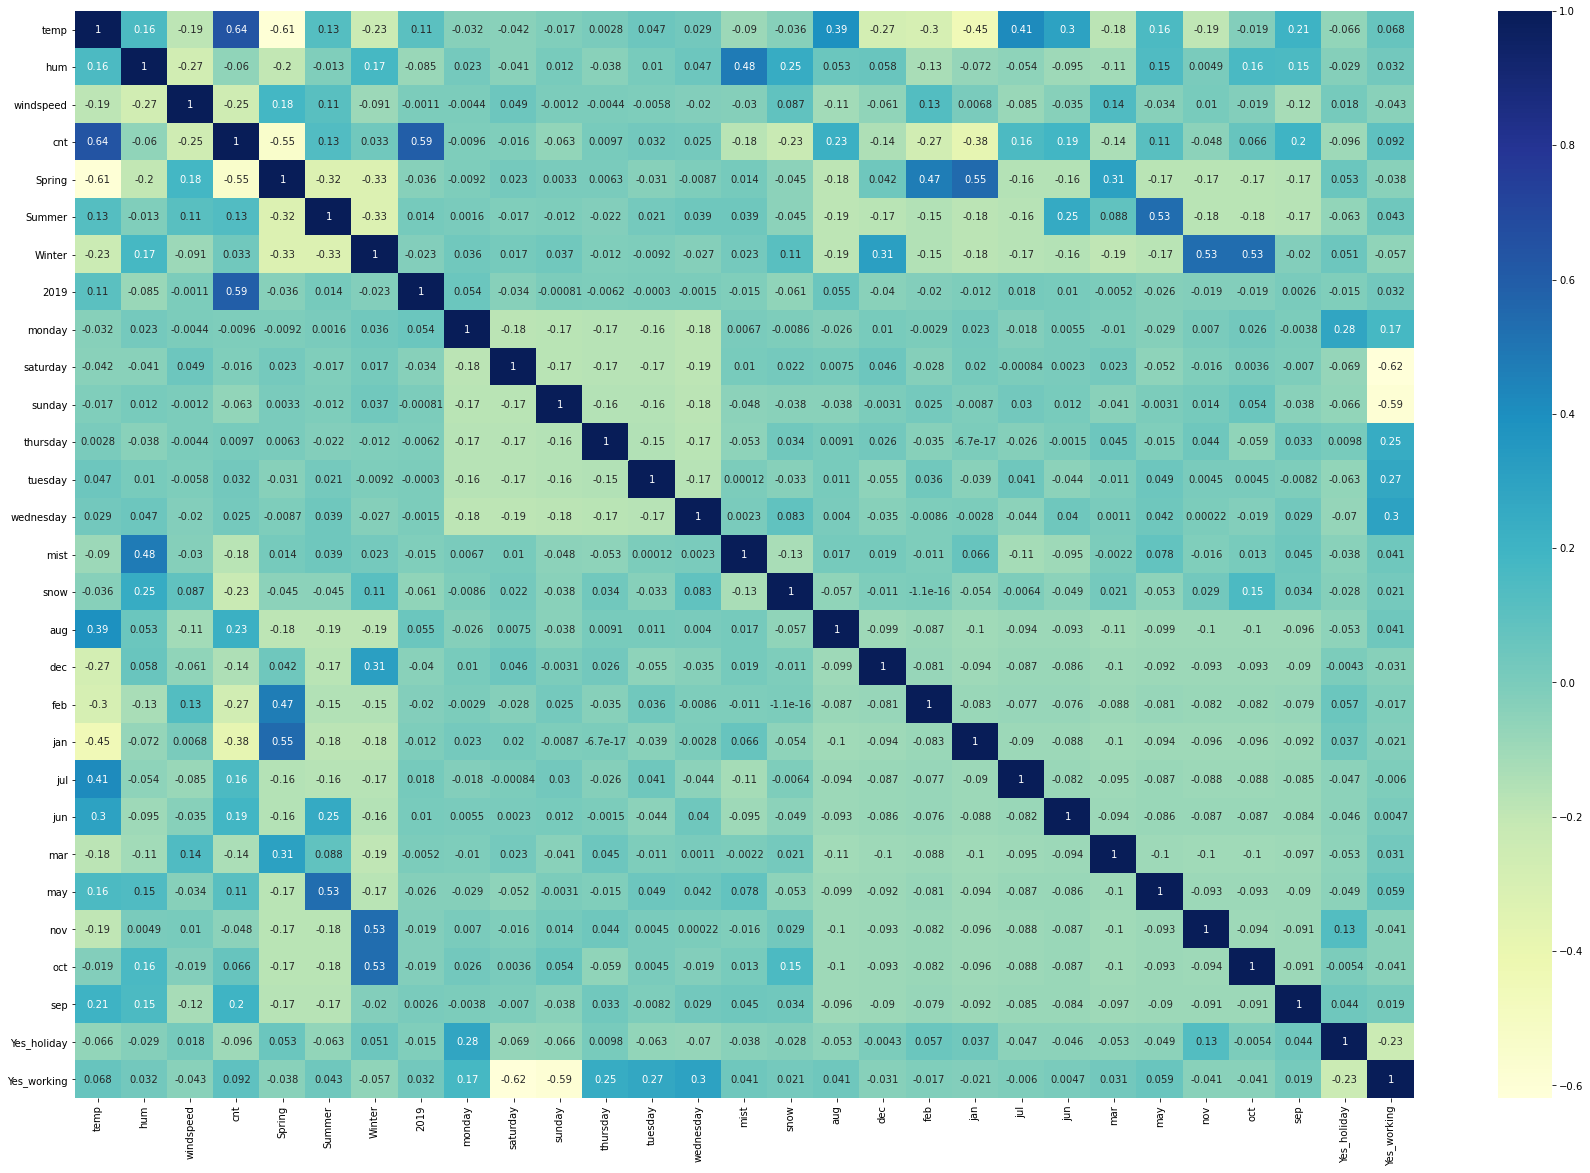

In [234]:
# Check teh correlation  coefficient again in the trained dataset
plt.figure(figsize = (30, 20))
sns.heatmap(bike_ds_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 3: Data Modelling & Evaluation

In [235]:
# Scaling the some of the features
var = ['temp','hum','windspeed']

In [276]:
scaler = MinMaxScaler()
bike_ds_train[var] = scaler.fit_transform(bike_ds_train[var])

In [237]:
bike_ds_train.head()

,dteday,temp,hum,windspeed,cnt,Spring,Summer,Winter,2019,monday,...,jan,jul,jun,mar,may,nov,oct,sep,Yes_holiday,Yes_working
653,16-10-2019,0.509887,0.575354,0.300794,7534,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
576,31-07-2019,0.815169,0.725633,0.264686,7216,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
426,03-03-2019,0.442393,0.640189,0.255342,4066,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
728,30-12-2019,0.245101,0.498067,0.663106,1796,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
482,28-04-2019,0.395666,0.504508,0.188475,4220,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
# Dividing the training dataset into X and y.
y_train = bike_ds_train.pop('cnt')
X_train = bike_ds_train

In [240]:
y_train

653    7534
576    7216
426    4066
728    1796
482    4220
       ... 
526    6664
578    7261
53     1917
350    2739
79     2077
Name: cnt, Length: 510, dtype: int64

In [241]:
y_train.shape
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [242]:
X_train

,dteday,temp,hum,windspeed,Spring,Summer,Winter,2019,monday,saturday,...,jan,jul,jun,mar,may,nov,oct,sep,Yes_holiday,Yes_working
653,16-10-2019,0.509887,0.575354,0.300794,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
576,31-07-2019,0.815169,0.725633,0.264686,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
426,03-03-2019,0.442393,0.640189,0.255342,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
728,30-12-2019,0.245101,0.498067,0.663106,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,28-04-2019,0.395666,0.504508,0.188475,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,11-06-2019,0.824514,0.605840,0.355596,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
578,02-08-2019,0.863973,0.679690,0.187140,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
53,23-02-2018,0.202618,0.435939,0.111379,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350,17-12-2018,0.248216,0.577930,0.431816,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [243]:
X_train.shape

(510, 29)

In [244]:
bike_ds_train.columns

Index(['dteday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter',
       '2019', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'mist', 'snow', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'Yes_holiday', 'Yes_working'],
      dtype='object')

###### Add one variable at a time and create  models until we find that adding more predictors are not impacting the R2 ot adjusted R2

In [245]:
# Statistical signifinace of a variable and 
# VIF

In [246]:
# Building a model using statsmodel
# Add a constant
X_train_lm = sm.add_constant(X_train['temp'])


In [247]:
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [248]:
lr_1.params

const    1497.882426
temp     5562.458744
dtype: float64

In [249]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           5.80e-61
Time:                        00:13:02   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.000    1161.819    1833.946
temp        5562.4587    293.549     18.949      0.000    4985.738    6139.179
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# Add another variable

In [250]:
X_train_lm = sm.add_constant(X_train[['temp','2019']])
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [251]:
lr_2 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.25e-130
Time:                        00:13:18   Log-Likelihood:                -4288.4
No. Observations:                 510   AIC:                             8583.
Df Residuals:                     507   BIC:                             8596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        714.1297    129.839      5.500      0.000     459.041     969.218
temp        5072.2924    214.888     23.604      0.000    4650.112    5494.473
2019        2061.8584     96.979     21.261      0.000    1871.328    2252.389
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
X_train_lm = sm.add_constant(X_train[['temp','2019','windspeed']])
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     416.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.84e-136
Time:                        00:15:25   Log-Likelihood:                -4270.3
No. Observations:                 510   AIC:                             8549.
Df Residuals:                     506   BIC:                             8565.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1386.8344    166.908      8.309      0.000    1058.916    1714.753
temp        4829.0832    211.366     22.847      0.000    4413.820    5244.346
2019        2072.9922     93.700     22.124      0.000    1888.904    2257.081
windspeed  -1707.4394    279.511     -6.109      0.000   -2256.585   -1158.293
==============================================================================
Omnibus:                       23.079   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.405
Skew:                          -0.433   Prob(JB):                     6.79e-07
Kurtosis:                       3.767   Cond. No.                         8.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
X_train_lm = sm.add_constant(X_train[['temp','2019','windspeed','Spring']])
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     388.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.86e-152
Time:                        00:25:58   Log-Likelihood:                -4229.1
No. Observations:                 510   AIC:                             8468.
Df Residuals:                     505   BIC:                             8489.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2319.4488    183.294     12.654      0.000    1959.336    2679.562
temp        3480.8203    242.206     14.371      0.000    3004.965    3956.676
2019        2101.2726     86.578     24.270      0.000    1931.175    2271.370
windspeed  -1499.5828    259.057     -5.789      0.000   -2008.544    -990.621
Spring     -1189.7772    126.555     -9.401      0.000   -1438.416    -941.138
==============================================================================
Omnibus:                       84.617   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.749
Skew:                          -0.865   Prob(JB):                     1.15e-43
Kurtosis:                       5.512   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
X_train_lm = sm.add_constant(X_train[['temp','2019','windspeed','Spring','snow']])
lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     373.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.31e-167
Time:                        00:28:46   Log-Likelihood:                -4192.4
No. Observations:                 510   AIC:                             8397.
Df Residuals:                     504   BIC:                             8422.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2431.3508    171.204     14.202      0.000    2094.990    2767.711
temp        3352.8122    226.074     14.831      0.000    2908.648    3796.976
2019        2061.2061     80.773     25.519      0.000    1902.513    2219.899
windspeed  -1305.8741    242.300     -5.390      0.000   -1781.916    -829.833
Spring     -1283.2278    118.357    -10.842      0.000   -1515.761   -1050.694
snow       -2114.6216    239.384     -8.834      0.000   -2584.935   -1644.308
==============================================================================
Omnibus:                       52.857   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.345
Skew:                          -0.635   Prob(JB):                     7.28e-22
Kurtosis:                       4.723   Cond. No.                         9.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
X_train_lm = sm.add_constant(X_train[['temp','2019','windspeed','Spring','snow','jan']])
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     318.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.84e-168
Time:                        00:30:59   Log-Likelihood:                -4187.3
No. Observations:                 510   AIC:                             8389.
Df Residuals:                     503   BIC:                             8418.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2543.1934    173.260     14.679      0.000    2202.792    2883.595
temp        3215.2641    228.166     14.092      0.000    2766.988    3663.541
2019        2068.6287     80.083     25.831      0.000    1911.291    2225.967
windspeed  -1405.3660    242.148     -5.804      0.000   -1881.112    -929.620
Spring     -1121.6032    127.788     -8.777      0.000   -1372.668    -870.538
snow       -2142.6846    237.402     -9.026      0.000   -2609.106   -1676.263
jan         -547.0650    171.644     -3.187      0.002    -884.292    -209.838
==============================================================================
Omnibus:                       56.052   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.009
Skew:                          -0.659   Prob(JB):                     9.56e-24
Kurtosis:                       4.804   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
X_train_lm = sm.add_constant(X_train[['temp','2019','windspeed','Spring','snow','jan','mist']])
lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     317.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.03e-179
Time:                        00:32:29   Log-Likelihood:                -4156.3
No. Observations:                 510   AIC:                             8329.
Df Residuals:                     502   BIC:                             8362.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2900.7827    169.099     17.154      0.000    2568.553    3233.012
temp        3032.9735    216.081     14.036      0.000    2608.438    3457.509
2019        2061.2986     75.431     27.327      0.000    1913.100    2209.497
windspeed  -1453.8991    228.144     -6.373      0.000   -1902.134   -1005.664
Spring     -1191.5550    120.668     -9.875      0.000   -1428.632    -954.478
snow       -2379.4156    225.513    -10.551      0.000   -2822.481   -1936.350
jan         -489.6570    161.818     -3.026      0.003    -807.580    -171.734
mist        -645.3856     80.025     -8.065      0.000    -802.611    -488.161
==============================================================================
Omnibus:                       61.394   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.041
Skew:                          -0.626   Prob(JB):                     2.62e-33
Kurtosis:                       5.343   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
X_train_lm = sm.add_constant(X_train[['temp','2019','windspeed','Spring','snow','jan','mist','Winter']])
lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.2
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.89e-180
Time:                        00:34:56   Log-Likelihood:                -4151.5
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     501   BIC:                             8359.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2469.8358    219.131     11.271      0.000    2039.307    2900.364
temp        3509.1450    264.977     13.243      0.000    2988.541    4029.749
2019        2051.7264     74.877     27.401      0.000    1904.614    2198.839
windspeed  -1357.3219    228.470     -5.941      0.000   -1806.199    -908.445
Spring      -958.9719    141.833     -6.761      0.000   -1237.634    -680.310
snow       -2433.2333    224.356    -10.845      0.000   -2874.027   -1992.439
jan         -422.1658    162.003     -2.606      0.009    -740.455    -103.877
mist        -639.3894     79.393     -8.053      0.000    -795.373    -483.405
Winter       345.4374    113.050      3.056      0.002     123.326     567.548
==============================================================================
Omnibus:                       72.614   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.341
Skew:                          -0.710   Prob(JB):                     2.82e-42
Kurtosis:                       5.643   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 5:  Residual Analysis 

In [267]:
y_train_pred = lr_8.predict(X_train_lm)

In [269]:
res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

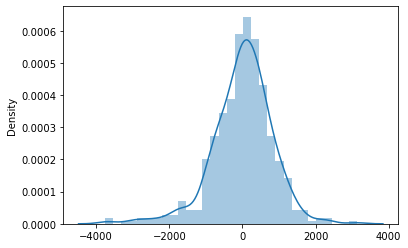

In [270]:
sns.distplot(res)

## Step 6 - Prediction

In [ ]:
# Apply teh model on TEST set

In [277]:
bike_ds_test[var] = scaler.transform(bike_ds_test[var])

In [ ]:
y_test = bike_ds_test.pop('cnt')

In [278]:
X_test = bike_ds_test

In [282]:
#predict
X_test_lm = sm.add_constant(X_test[['temp','2019','windspeed','Spring','snow','jan','mist','Winter']])
y_test_pred = lr_8.predict(X_test_lm)

In [283]:
#evaluat 
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7765352403568863

### Model seems to be okay now with optimal predictors - 
### TRAIN - R squared - 81.9, Adj R squared - 81.6, 
### TEST -  Rsquared - 77.6
### Predictors are - 'temp','2019','windspeed','Spring','snow','jan','mist','Winter'